# 5. OC - INTRO MACHINE LEARNING

In [2]:
# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# On charge le dataset
house_path = 'C:/2.DATA_SCIENCE/LOE/7. OPENCLASSROOM\OPENCLASSROOM_COURS/5-INTRO_MACHINE_LEARNING/'
house_data = pd.read_csv('house.csv')

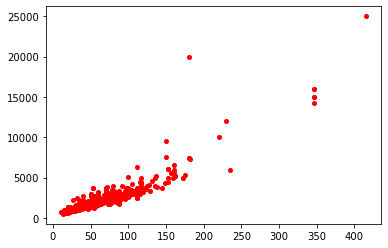

In [4]:
# On affiche le nuage de points dont on dispose
plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)
plt.show()

In [5]:
house_data = house_data[house_data['loyer'] < 10000]

# Apprentissage : trouvez le θ optimal

In [6]:
# On décompose le dataset et on le transforme en matrices pour pouvoir effectuer notre calcul
X = np.matrix([np.ones(house_data.shape[0]), house_data['surface'].values]).T
y = np.matrix(house_data['loyer']).T

# On effectue le calcul exact du paramètre theta
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta)

[[266.45460292]
 [ 30.66119596]]


# Effectuer des prédictions

In [7]:
# theta.item(0) + theta.item(1) * surface_en_m2
#  ex : 35 m2
theta.item(0) + theta.item(1) * 35

1339.5964615602256

# implémentation de la régression linéaire dans scikit learn

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)
regr.predict(<des données de test>)

# Echantillonage pour être certain d'avoir des données non biaisées

In [ ]:
sample = np.random.randint(data_size, size=int(data_size*0.1) )
sampled_data = data[sample]

In [11]:
# avec librairie scikit learn
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)

# MODELE KNN

In [12]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [13]:
# Le dataset principal qui contient toutes les images
print (mnist.data.shape)

# Le vecteur d'annotations associé au dataset (nombre entre 0 et 9)
print (mnist.target.shape)

(70000, 784)
(70000,)


## ECHANTILLONNAGE

In [15]:
# UTILISER sklearn.utils.resample mieux sans doublons
data = mnist.data[sample]
target = mnist.target[sample]
sample = np.random.randint(70000, size=5000)
data = mnist.data[sample]
target = mnist.target[sample]

## SEPARER TRAIN SET ET VAL SET

In [18]:
# 0.8 ==> 80% TRAIN SET ET 20% VAL SET
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)

## MODELE KNN

In [19]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

## SCORE

In [20]:
error = 1 - knn.score(xtest, ytest)
print('Erreur: %f' % error)

Erreur: 0.078000


# OPTIMIZATION : recherche K maximal

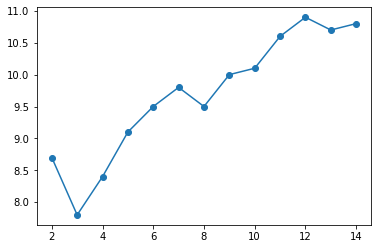

In [21]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(2,15), errors, 'o-')
plt.show()
#  k = 4 le plus performant

## exemple pour le mdèle le plus performant

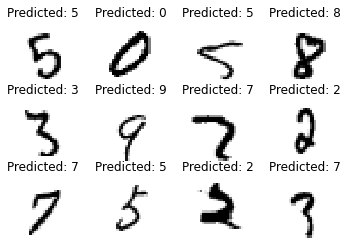

In [22]:
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(4)
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)

# On redimensionne les données sous forme d'images
images = xtest.reshape((-1, 28, 28))

# On selectionne un echantillon de 12 images au hasard
select = np.random.randint(images.shape[0], size=12)

# On affiche les images avec la prédiction associée
fig,ax = plt.subplots(3,4)

for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format( predicted[value]) )

plt.show()

## Exemple pour les prédictions erronées

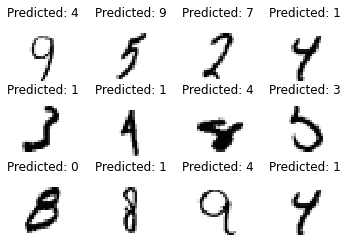

In [23]:
# on récupère les données mal prédites 
misclass = (ytest != predicted)
misclass_images = images[misclass,:,:]
misclass_predicted = predicted[misclass]

# on sélectionne un échantillon de ces images
select = np.random.randint(misclass_images.shape[0], size=12)

# on affiche les images et les prédictions (erronées) associées à ces images
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format(misclass_predicted[value]) )

plt.show()